### 12 STOCHASTIC PROGRAMS, PROBABILITY, AND STATISTICS

In [2]:
import random

def rollDie():
    """Returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])
def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [3]:
rollN(10)

6446543561


In [4]:
import random

def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [5]:
flipSim(100, 1)

0.53

In [6]:
flipSim(100, 1)

0.49

In [7]:
flipSim(100, 100)

0.5024999999999998

In [8]:
flipSim(100, 100)

0.4960000000000001

In [9]:
flipSim(100, 1000000)

0.4999833799999995

In [10]:
flipSim(100, 1000000)

0.5000044300000075

In [ ]:
import pylab
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
    Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    ratios.append(numHeads/float(numTails))
    diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, "bo")
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, "bo")
#random.seed(0)
flipPlot(4, 20)

In [ ]:
random.seed(0)
flipPlot(4, 20)

In [20]:
def stdDev(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5 #Square root of mean difference

In [23]:
import pylab

def makePlot(xVals, yVals, title, xLabel, yLabel, style,
    logX = False, logY = False):
    """Plots xVals vs. yVals with supplied titles and labels."""
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
    numTrials a positive integer
    Plots summaries of results of numTrials trials of
    2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
    'Number of flips', 'Mean Heads/Tails', 'bo', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
    'Number of Flips', 'Standard Deviation', 'bo',
    logX = True, logY = True)

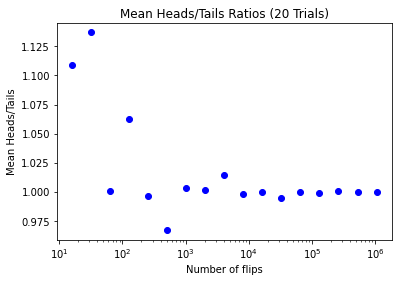

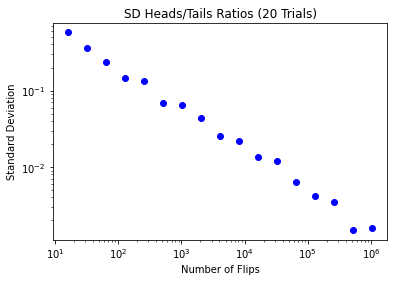

In [24]:
flipPlot1(4, 20, 20)

In [ ]:
title = 'Mean abs(#Heads - #Tails)' + numTrialsString
makePlot(xAxis, diffsMeans, title,
'Number of Flips', 'Mean abs(#Heads - #Tails)', 'bo',
logX = True, logY = True)
title = 'SD abs(#Heads - #Tails)' + numTrialsString
makePlot(xAxis, diffsSDs, title,
'Number of Flips', 'Standard Deviation', 'bo',
logX = True, logY = True)

In [26]:
def CV(X):
    mean = sum(X)/float(len(X))
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [29]:
def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
    numTrials a positive integer
    Plots summaries of results of numTrials trials of
    2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs = [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
    'Number of flips', 'Mean Heads/Tails', 'bo', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
    'Number of Flips', 'Standard Deviation', 'bo',
    logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
    'Number of Flips', 'Mean abs(#Heads - #Tails)', 'bo',
    logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
    'Number of Flips', 'Standard Deviation', 'bo',
    logX = True, logY = True)
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of Flips',
    'Coeff. of Var.', 'bo', logX = True)
    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of Flips',
    'Coeff. of Var.', 'bo', logX = True, logY = True)  

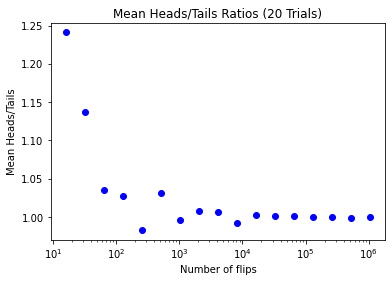

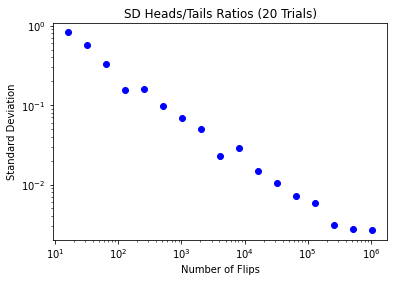

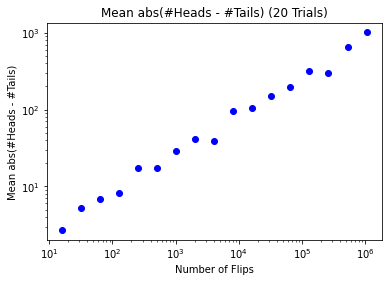

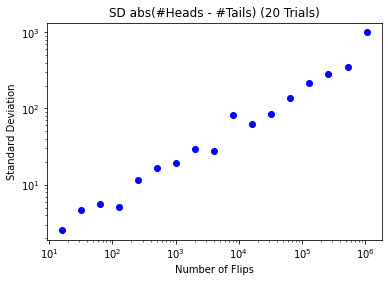

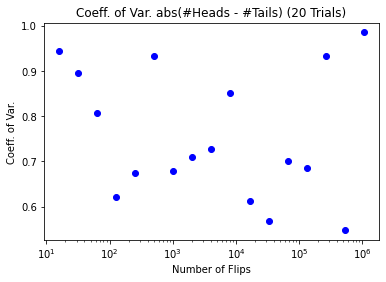

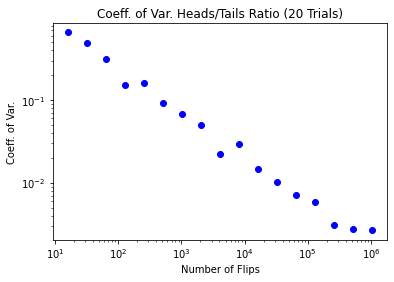

In [30]:
flipPlot1(4, 20, 20)

(array([ 24.,  64.,  80., 133., 178., 195., 154., 104.,  55.,  15.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <BarContainer object of 10 artists>)

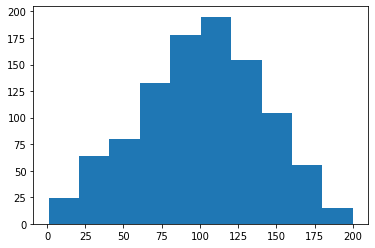

In [31]:
vals = [1, 200] #guarantee that values will range from 1 to 200
for i in range(1000):
    num1 = random.choice(range(1, 100))
    num2 = random.choice(range(1, 100))
    vals.append(num1+num2)
pylab.hist(vals, bins = 10)

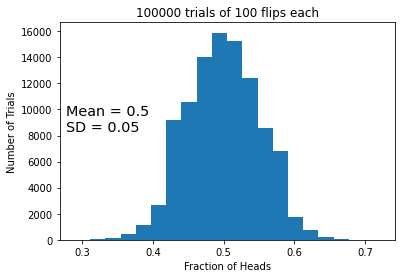

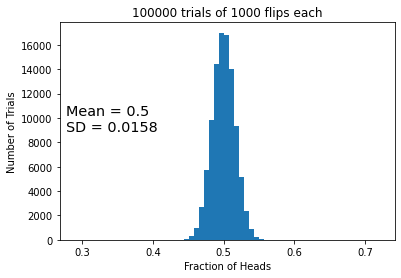

In [32]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
    + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
    'Mean = ' + str(round(mean, 4))
    + '\nSD = ' + str(round(sd, 4)), size='x-large')

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

random.seed(0)
makePlots(100,1000,100000)

In [37]:
def showErrorBars(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
    numTrials a positive integer
    Plots mean fraction of heads with error bars"""
    means, sds = [], []
    xVals = []
    for exp in range(minExp, maxExp + 1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals, means,
    yerr=2*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads (' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads & 95% confidence')

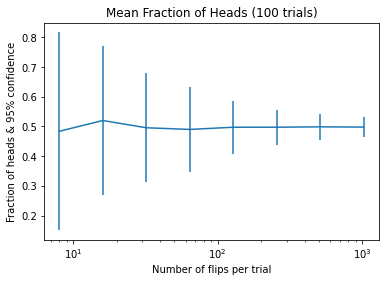

In [39]:
showErrorBars(3, 10, 100)

In [40]:
def clear(n, p, steps):
    """Assumes n & steps positive ints, p a float
    n: the initial number of molecules
    p: the probability of a molecule being cleared
    steps: the length of the simulation"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of Drug')

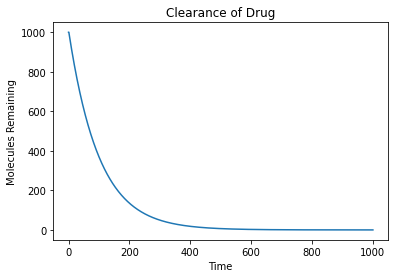

In [41]:
clear(1000, 0.01, 1000)

In [48]:
def clear(n, p, steps):
    """Assumes n & steps positive ints, p a float
    n: the initial number of molecules
    p: the probability of a molecule being cleared
    steps: the length of the simulation"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.semilogy(n)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of Drug')

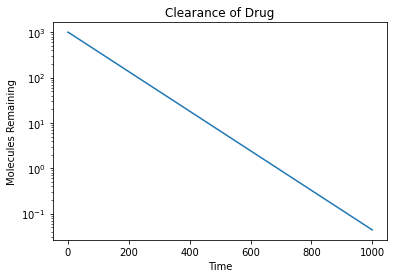

In [49]:
clear(1000, 0.01, 1000)

Text(0.5, 1.0, 'Probability of Starting Each Try 0.5')

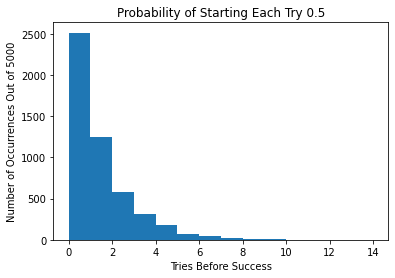

In [51]:
def successfulStarts(eventProb, numTrials):
    """Assumes eventProb is a float representing a probability
    of a single attempt being successful. numTrials a positive int
    Returns a list of the number of attempts needed before a
    success for each trial."""
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > eventProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

random.seed(0)
probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials)
pylab.hist(distribution, bins = 14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurrences Out of ' + str(numTrials))
pylab.title('Probability of Starting Each Try ' + str(probOfSuccess))

In [58]:
def playSeries(numGames, teamProb):
    """Assumes numGames an odd integer,
    teamProb a float between 0 and 1
    Returns True if better team wins series"""
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)

def simSeries(numSeries):
        prob = 0.5
        fracWon = []
        probs = []
        while prob <= 1.0:
            seriesWon = 0.0
            for i in range(numSeries):
                if playSeries(7, prob):
                    seriesWon += 1
            fracWon.append(seriesWon/numSeries)
            probs.append(prob)
            prob += 0.01

        pylab.plot(probs, fracWon, linewidth = 5)
        pylab.xlabel('Probability of Winning a Game')
        pylab.ylabel('Probability of Winning a Series')
        pylab.axhline(0.95)
        pylab.ylim(0.5, 1.1)
        pylab.title(str(numSeries) + ' Seven-Game Series')

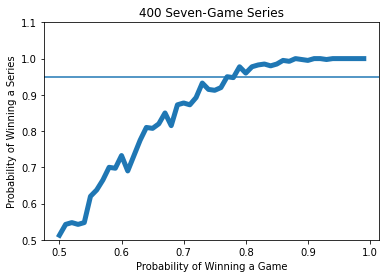

In [59]:
simSeries(400)

In [66]:
def findSeriesLength(teamProb):
    numSeries = 200
    maxLen = 2500
    step = 10

    def fracWon(teamProb, numSeries, seriesLen):
        won = 0.0
        for series in range(numSeries):
            if playSeries(seriesLen, teamProb):
                won += 1
        return won/numSeries
        winFrac = []
        xVals = []
        for seriesLen in range(1, maxLen, step):
            xVals.append(seriesLen)
            winFrac.append(fracWon(teamProb, numSeries, seriesLen))
        pylab.plot(xVals, winFrac, linewidth = 5)
        pylab.xlabel('Length of Series')
        pylab.ylabel('Probability of Winning Series')
        pylab.title(str(round(teamProb, 4)) +
        ' Probability of Better Team Winning a Game')
        pylab.axhline(0.95) #draw horizontal line at y = 0.95

In [67]:
YanksProb = 0.636
PhilsProb = 0.574
findSeriesLength(YanksProb/(YanksProb + PhilsProb))

In [68]:
def collisionProb(n, k):
    prob = 1.0
    for i in range(1, k):
        prob = prob * ((n-i)/float(n))
    return 1 - prob

In [69]:
collisionProb(1000, 50)

0.7122686568799875